# Data Project #5 - Neural Networks 


## Gas Turbine CO and NOx Emission Data Set Data Set

URL: https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set

This dataset contains 36,733 instances with 11 features. The features are all continuous values. Each instance is of 11 sensor measures from a gas turbine located in Turkey's north western region collected from 2011 until 2015. This is a regression task and the goal is to predict the Turbine Energy Yield using the sensor measures as predictors. 

### Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

**Variable (Abbr.) Unit Min Max Mean**

**Ambient temperature (AT)** 6.23 37.10 17.71

**Ambient pressure (AP) mbar** 985.85 1036.56 1013.07

**Ambient humidity (AH) (%)** 24.08 100.20 77.87

**Air filter difference pressure (AFDP) mbar** 2.09 7.61 3.93

**Gas turbine exhaust pressure (GTEP) mbar**  17.70 40.72 25.56

**Turbine inlet temperature (TIT) C** 1000.85 1100.89 1081.43

**Turbine after temperature (TAT) C** 511.04 550.61 546.16

**Compressor discharge pressure (CDP) mbar** 9.85 15.16 12.06

**Turbine energy yield (TEY) MWH** 100.02 179.50 133.51

**Carbon monoxide (CO) mg/m3** 0.00 44.10 2.37

**Nitrogen oxides (NOx) mg/m3** 25.90 119.91 65.29

This is a regression problem statement, and the dependent variable is the Turbine Energy Yield(TEY). Using the remaining 10 continous features as independent features.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#the data was collected over a span of five years from 2011 to 2015
#the data files do not contain a datetime feature, however are ordered
#chronologically.

path = './Datasets'
files = [file for file in os.listdir(path) if not file.startswith('.')]

df = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path + '/' + file)
    df = pd.concat([df, current_data])

In [5]:
#display first five instances of data
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [6]:
#display the shape of the dataframe
df.shape

(36733, 11)

In [7]:
#technical information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36733 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.4 MB


In [8]:
#check for missing values
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [9]:
#display statistics on data
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


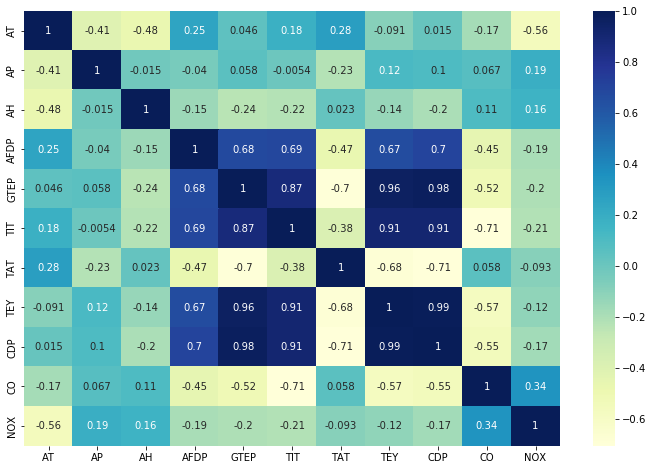

In [17]:
#create a correlation matrix(pearsons r)
plt.figure(figsize=(12, 8))
correlation_matrix = sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [18]:
#Independent Features(X)
#Dependent Feature(y)

X = df.drop(columns=['TEY'], axis=1, inplace=False)
y = df['TEY']

In [19]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...
7379,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,10.411,10.99300,89.172
7380,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,10.344,11.14400,88.849
7381,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,10.462,11.41400,96.147
7382,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,11.771,3.31340,64.738


In [20]:
y

0       134.67
1       134.67
2       135.10
3       135.03
4       134.67
         ...  
7379    109.08
7380    108.79
7381    107.81
7382    131.41
7383    125.41
Name: TEY, Length: 36733, dtype: float64

In [21]:
#TRAIN TEST SPLIT
#Split the dataset, 80% training, 20% testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print('Training Datasets Dimensions\n')

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

print('\nTesting Datasets Dimensions\n')

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

Training Datasets Dimensions

X_train: (29386, 10)
y_train: (29386,)

Testing Datasets Dimensions

X_test: (7347, 10)
y_test: (7347,)


In [24]:
#Feature Scaling, use the standard scaler for standarizing the features since they vary in units and magnitude
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [25]:
X_train

array([[-0.9815162 ,  2.46444103, -0.06821099, ...,  1.93625245,
        -0.88106441, -0.53654769],
       [ 0.3958714 , -0.12964382,  0.99234735, ..., -1.40547645,
         1.23702005, -0.85072696],
       [ 0.26046127,  0.36742633,  1.03220233, ..., -1.14750233,
         0.85051593, -1.16994061],
       ...,
       [ 0.92230186, -0.19177759, -0.49753576, ...,  0.17817255,
        -0.32102319,  0.42757821],
       [-1.46866965,  0.49169387,  0.6254736 , ..., -0.1312128 ,
        -0.68791925,  1.20116574],
       [-0.09179353, -0.92184938, -0.29680529, ...,  1.20639682,
        -0.64156726,  1.03938304]])

In [30]:
#Using sklearn, multilayer perceptron neural network
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=1, 
                             solver='adam', 
                             learning_rate='adaptive', 
                             max_iter=500)

In [31]:
mlp_regressor.fit(X_train, y_train)

MLPRegressor(learning_rate='adaptive', max_iter=500, random_state=1)

In [32]:
from sklearn.metrics import mean_squared_error

y_pred = mlp_regressor.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.46361956930178294


In [33]:
print('Coefficient of Determination(r^2):', mlp_regressor.score(X_test, y_test))

Coefficient of Determination(r^2): 0.9980976522948147


## Keras and Tensorflow model

In [36]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import models

print(tf.__version__)

2.8.0


In [39]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1], )))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                704       
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
919/919 [==============================] - 2s 2ms/step - loss: 90.3698 - mae: 6.9809
Epoch 2/5
919/919 [==============================] - 2s 2ms/step - loss: 36.6405 - mae: 4.2936
Epoch 3/5
919/919 [==============================] - 2s 2ms/step - loss: 12.4004 - mae: 2.3972
Epoch 4/5
919/919 [==============================] - 2s 2ms/step - loss: 4.1461 - mae: 1.3693
Epoch 5/5
919/919 [==============================] - 2s 2ms/step - loss: 1.7385 - mae: 0.9302


In [43]:
model.evaluate(X_test, y_test)

230/230 [==============================] - 1s 2ms/step - loss: 1.2614 - mae: 0.8205


[1.2613571882247925, 0.8205165266990662]

In [44]:
#MAE: 0.82 for TEY